In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Channel_Revenue.xlsx')
Organic_Search = pd.read_excel(xls, 'Organic Search')
Direct = pd.read_excel(xls, 'Direct')
Referral = pd.read_excel(xls, 'Referral')
Social = pd.read_excel(xls, 'Social')
Affiliates = pd.read_excel(xls, 'Affiliates')
Paid_Search = pd.read_excel(xls, 'Paid Search')

In [3]:
#Remove the dates for ease
Organic_Search = Organic_Search['Revenue']
Direct = Direct['Revenue']
Referral = Referral['Revenue']
Social = Social['Revenue']
Affiliates = Affiliates['Revenue']
Paid_Search = Paid_Search['Revenue']

In [4]:
#convert datasets into arrays
Organic_Search = Organic_Search.values
Direct = Direct.values
Referral = Referral.values
Social = Social.values
Affiliates = Affiliates.values
Paid_Search = Paid_Search.values

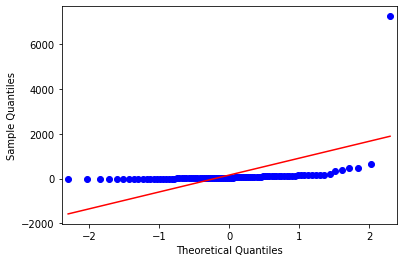

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Organic_Search, line='s')
pyplot.show()

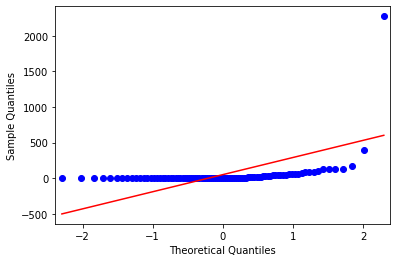

In [6]:
qqplot(Direct, line='s')
pyplot.show()

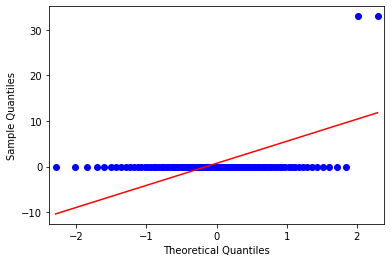

In [7]:
qqplot(Referral, line='s')
pyplot.show()

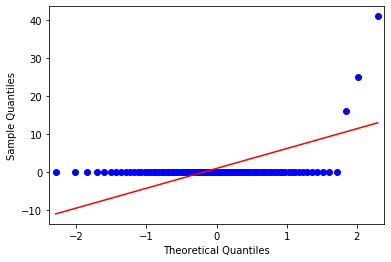

In [8]:
qqplot(Social, line='s')
pyplot.show()

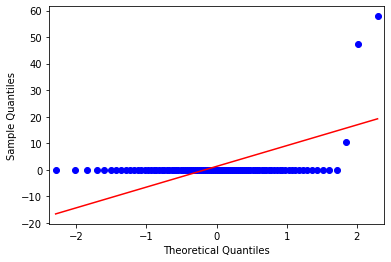

In [9]:
qqplot(Affiliates, line='s')
pyplot.show()

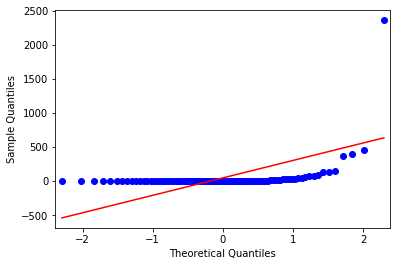

In [10]:
qqplot(Paid_Search, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [11]:
names = ["Organic_Search", "Direct", "Referral", "Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Organic_Search, Direct, Referral, Social, Affiliates, Paid_Search)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Organic_Search
Statistics=0.153, p=0.000
Sample does not look Gaussian (reject H0)
Direct
Statistics=0.180, p=0.000
Sample does not look Gaussian (reject H0)
Referral
Statistics=0.131, p=0.000
Sample does not look Gaussian (reject H0)
Social
Statistics=0.167, p=0.000
Sample does not look Gaussian (reject H0)
Affiliates
Statistics=0.152, p=0.000
Sample does not look Gaussian (reject H0)
Paid_Search
Statistics=0.192, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non-parametric tests should be used.

In [12]:
#import Kruskal–Wallis test: Non parametric method for testing whether samples originate from the same distribution. 
#Kruskal-Wallis can accommodate more than two groups, extending Wilcoxon-Mann-Whitney.
from scipy.stats import kruskal

In [13]:
stat, p = kruskal(Organic_Search, Direct, Referral, Social, Affiliates, Paid_Search)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:    
    print('The difference between the datasets is not significant (fail to reject H0)')
else:
    print('The difference between the datasets is significant (reject H0)')

Statistics=218.988, p=0.000
The difference between the datasets is significant (reject H0)


### We conclude that there is significant difference between the datasets

### Further investigation can be made using the Wilcoxon-Mann-Whitney (WMW) rank sum test in each pair of the datasets

In [14]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

### Organic against every other Channel

In [15]:
#Organic against every other Channel
names = ["Direct", "Referral", "Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Direct, Referral, Social, Affiliates, Paid_Search)):
    stat, p = ranksums(Organic_Search,i)
    print('Organic_Search -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Organic_Search - Direct
Statistics=5.344, p=0.000
The difference between the two datasets is significant (reject H0)
Organic_Search - Referral
Statistics=8.927, p=0.000
The difference between the two datasets is significant (reject H0)
Organic_Search - Social
Statistics=8.902, p=0.000
The difference between the two datasets is significant (reject H0)
Organic_Search - Affiliates
Statistics=8.849, p=0.000
The difference between the two datasets is significant (reject H0)
Organic_Search - Paid_Search
Statistics=6.227, p=0.000
The difference between the two datasets is significant (reject H0)


### Direct against every other Channel

In [16]:
#Direct against every other Channel
names = ["Referral", "Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Referral, Social, Affiliates, Paid_Search)):
    stat, p = ranksums(Direct,i)
    print('Direct -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Direct - Referral
Statistics=4.256, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - Social
Statistics=4.160, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - Affiliates
Statistics=4.138, p=0.000
The difference between the two datasets is significant (reject H0)
Direct - Paid_Search
Statistics=1.213, p=0.225
The difference between the two datasets is not significant (fail to reject H0)


### Refferal against Social, Affiliates and Paid_Search

In [17]:
#Refferal against Social, Affiliates, Paid_Search and Display
names = ["Social", "Affiliates", "Paid_Search"]
for index, i in enumerate((Social, Affiliates, Paid_Search)):
    stat, p = ranksums(Referral,i)
    print('Referral -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Referral - Social
Statistics=-0.125, p=0.900
The difference between the two datasets is not significant (fail to reject H0)
Referral - Affiliates
Statistics=-0.131, p=0.896
The difference between the two datasets is not significant (fail to reject H0)
Referral - Paid_Search
Statistics=-2.965, p=0.003
The difference between the two datasets is significant (reject H0)


### Social against Affiliates and Paid_Search

In [18]:
#Social against Affiliates, Paid_Search and Display
names = ["Affiliates", "Paid_Search"]
for index, i in enumerate((Affiliates, Paid_Search)):
    stat, p = ranksums(Social,i)
    print('Social -',names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('The difference between the two datasets is not significant (fail to reject H0)')
    else:
        print('The difference between the two datasets is significant (reject H0)')

Social - Affiliates
Statistics=-0.004, p=0.997
The difference between the two datasets is not significant (fail to reject H0)
Social - Paid_Search
Statistics=-2.866, p=0.004
The difference between the two datasets is significant (reject H0)


### Affiliates against Paid_Search

In [19]:
#Affiliates against Paid_Search
stat, p = ranksums(Affiliates,Paid_Search)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The difference between the two datasets is not significant (fail to reject H0)')
else:
    print('The difference between the two datasets is significant (reject H0)')

Statistics=-2.841, p=0.005
The difference between the two datasets is significant (reject H0)
